
Python Stastitical Machine Learning Project


    

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'



1. **<font color="blue"></font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively.
3. **<font color="blue"></font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue"></font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters.
5. **<font color="blue"></font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

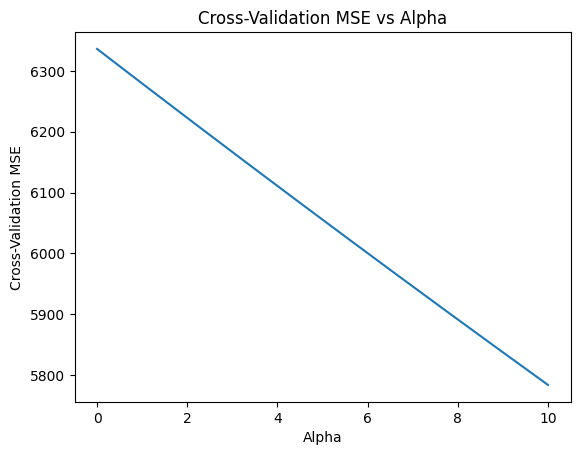

In [34]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

x1 = np.linspace(-20 , 20 , 100)

x2 = x1**2
x3 = x1**3
x4 = x1**4
x5 = x1**5

np.random.seed(0)
epsilon = np.random.normal(0 , 2 , 100)
y = 1.75 + 5*x1 + 0.05*x3 - 10.3*x5 + epsilon

X = np.column_stack((x1 , x2 , x3 , x4 , x5))

lasso = Lasso()

kf = KFold(n_splits = 5, shuffle = True , random_state = 0)
alphas = np.linspace(0.001 , 10 , 10)

mse_list = []

for alpha in alphas:
  lasso.set_params(alpha=alpha)
  mse = -cross_val_score(lasso, X, y , cv=kf , scoring = 'neg_mean_squared_error').mean()
  mse_list.append(mse)

plt.plot(alphas , mse_list)
plt.xlabel('Alpha')
plt.ylabel('Cross-Validation MSE')
plt.title('Cross-Validation MSE vs Alpha')
plt.show()


For this part upload `Wage.csv`.

1. **<font color="blue"></font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data.
2. **<font color="blue"></font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.pipeline import make_pipeline

data = pd.read_csv('Wage.csv')

print(data)

X = data[['age']].values
y = data[['wage']].values

print(X,y)

degrees  = np.arange(1 , 10)
cv_scores = []

for degree in degrees:
  model = make_pipeline(PolynomialFeatures(degree) , LinearRegression())
  scores = cross_val_score(model , X , y , cv=5 , scoring = 'neg_mean_squared_error')
  cv_scores.append(-np.mean(scores))

optimal_degree = degrees[np.argmin(cv_scores)]
print("Optimal degree for polynomial regresion d is:" , optimal_degree)

#It has chosen 4 as optimal degree


Optimal degree for polynomial regresion d is: 4


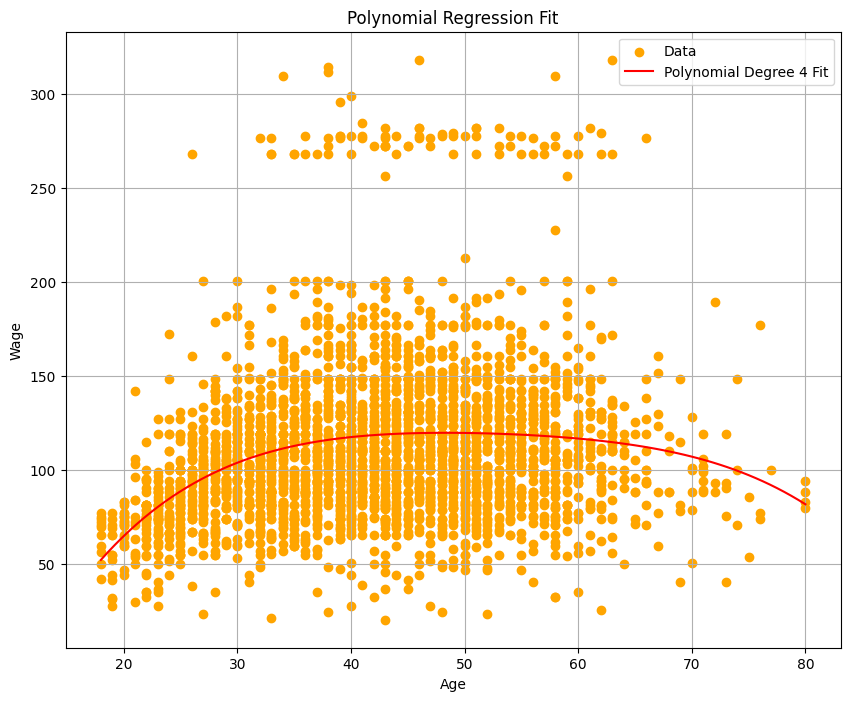

In [60]:
poly_model = make_pipeline(PolynomialFeatures(optimal_degree) , LinearRegression())
poly_model.fit(X , y)
X_plot = np.linspace(X.min() , X.max() , 100).reshape(-1 , 1)
y_plot = poly_model.predict(X_plot)

plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='orange', label='Data')
plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Degree {optimal_degree} Fit')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

Optimal number of cuts for step function: 10


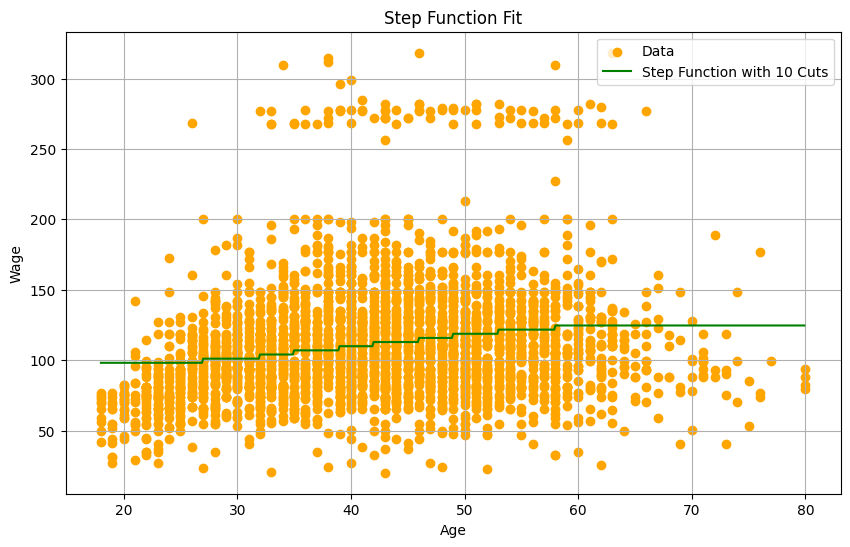

In [69]:
cuts_range = range(2, 11)
cv_scores_step = []


for n_cuts in cuts_range:
    model = make_pipeline(KBinsDiscretizer(n_bins=n_cuts, encode='ordinal'), LinearRegression())
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores_step.append(-np.mean(scores))


optimal_n_cuts = cuts_range[np.argmin(cv_scores_step)]
print("Optimal number of cuts for step function:", optimal_n_cuts)


step_model = make_pipeline(KBinsDiscretizer(n_bins=optimal_n_cuts, encode='ordinal'), LinearRegression())
step_model.fit(X, y)
X_binned = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1)
y_plot_step = step_model.predict(X_binned)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='orange', label='Data')
plt.plot(X_binned, y_plot_step, color='green', label=f'Step Function with {optimal_n_cuts} Cuts')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Step Function Fit')
plt.legend()
plt.grid(True)
plt.show()

Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load dataset
data = pd.read_csv("indian_liver_patient.csv")
data = data.dropna()

# selecting features and taregts
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# convert the gender in binary digits
X_encoded = pd.get_dummies(X, columns=['Gender'])


# Split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted', zero_division=1)
svm_recall = recall_score(y_test, svm_pred, average='weighted', zero_division=1)
svm_f1 = f1_score(y_test, svm_pred, average='weighted', zero_division=1)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_pred, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_pred, average='weighted', zero_division=1)

print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

SVM Accuracy: 0.6293103448275862
SVM Precision: 0.7667211652794292
SVM Recall: 0.6293103448275862
SVM F1 Score: 0.4861339171683999

Random Forest Accuracy: 0.603448275862069
Random Forest Precision: 0.5470467736428816
Random Forest Recall: 0.603448275862069
Random Forest F1 Score: 0.5396353547364248




1. **<font color="blue"></font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters.
2. **<font color="blue"></font>** Use a scatterplot to visualize the produced data.
3. **<font color="blue"></font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue"></font>** Visualize the results, separately.

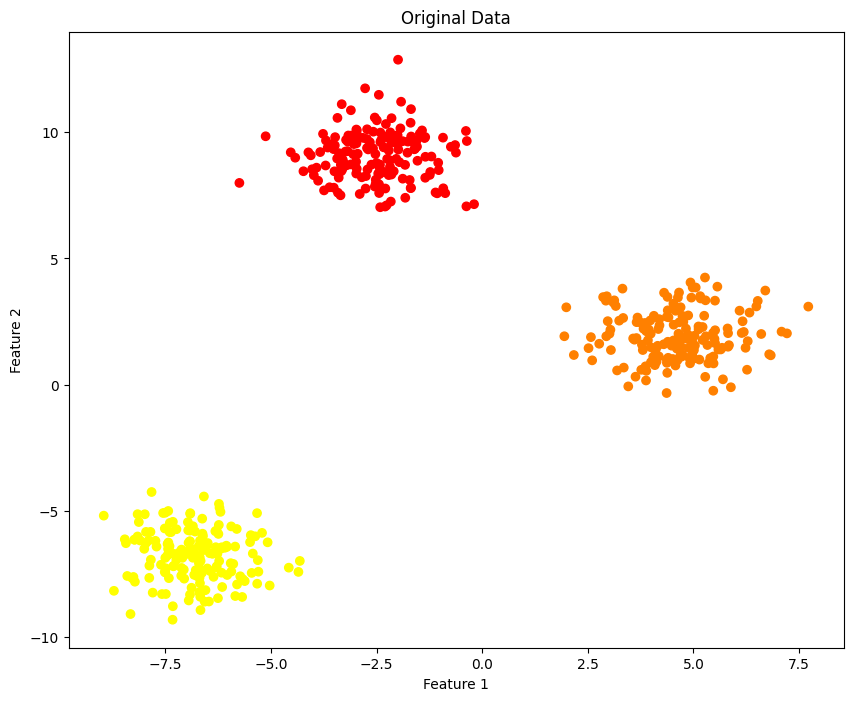

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

X , y = make_blobs(n_samples = 500 , centers = 3 , n_features = 2 , shuffle=True , random_state =42)

plt.figure(figsize=(10, 8))
plt.scatter(X[: , 0] , X[: , 1] , c=y , cmap='autumn')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


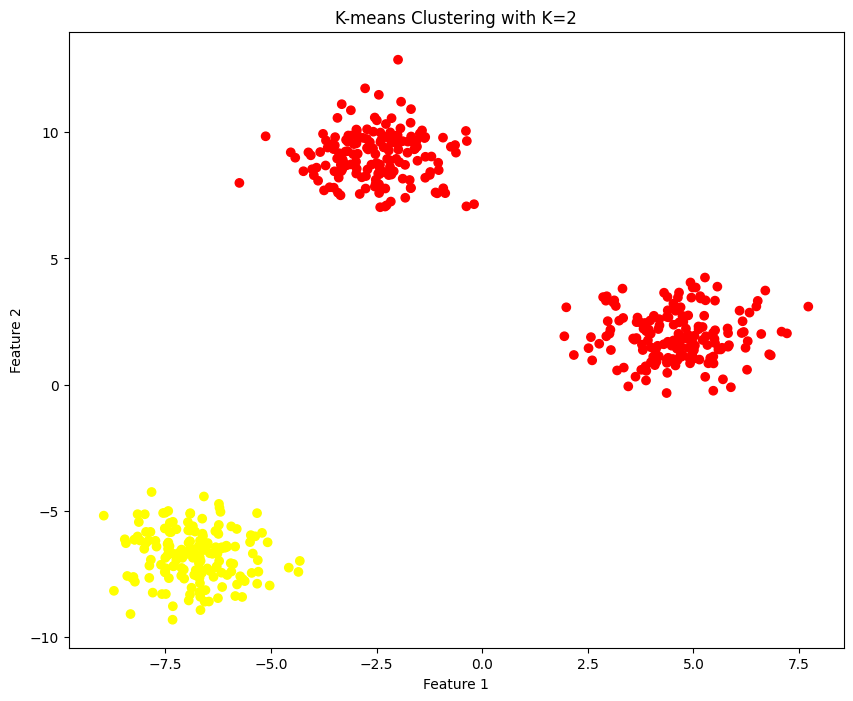

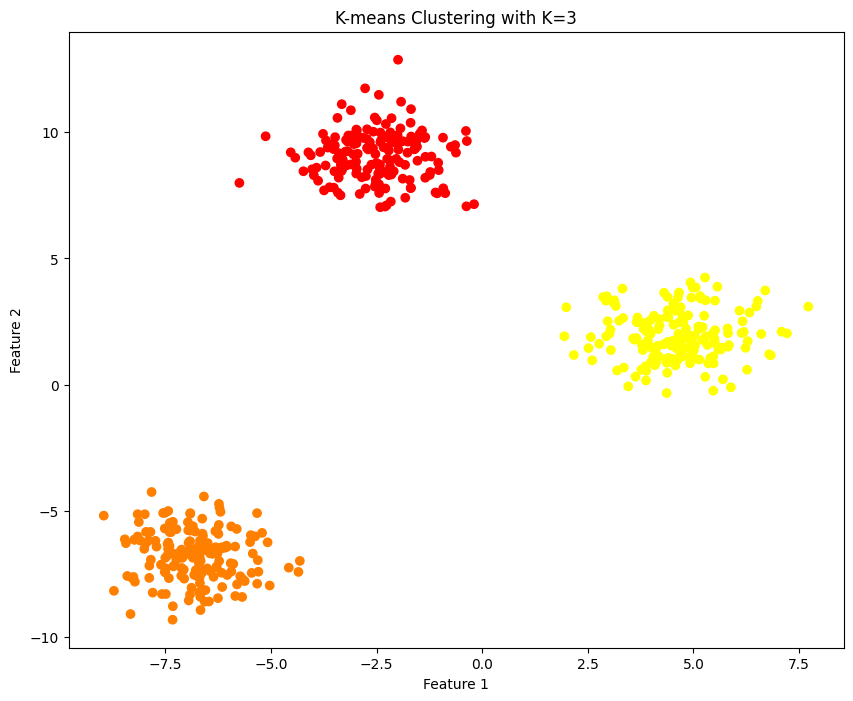

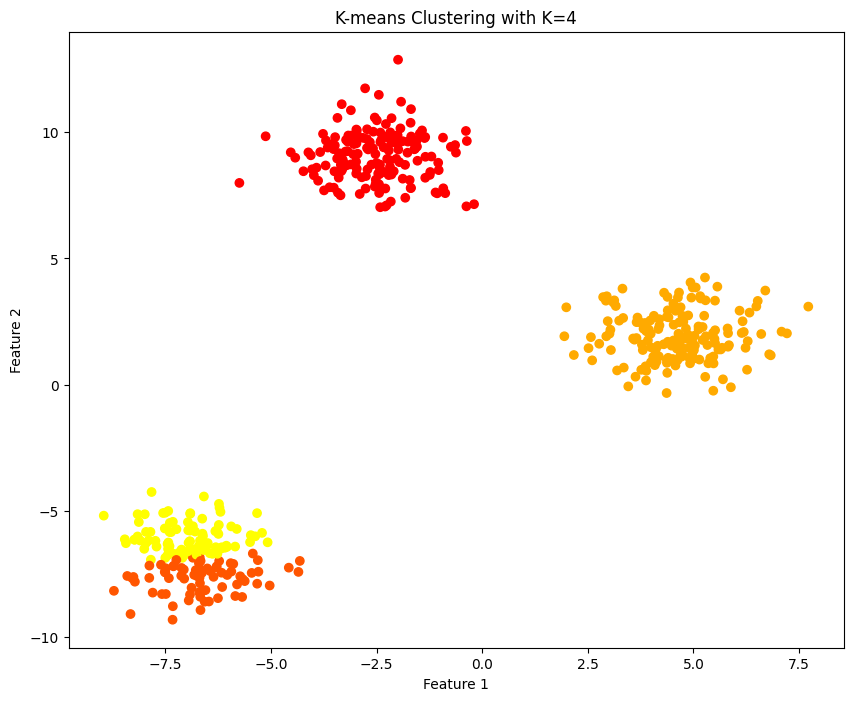

In [49]:
X_shuffled, y_shuffled  = shuffle(X , y , random_state = 42)

k_values = [ 2, 3 , 4]
for k in k_values:
  kmeans = KMeans(n_clusters = k , n_init = 10, random_state = 42)
  kmeans.fit(X_shuffled)
  labels =kmeans.labels_

  plt.figure(figsize=(10, 8))
  plt.scatter(X_shuffled[: , 0] , X_shuffled[: , 1] , c=labels , cmap = 'autumn')
  plt.title(f'K-means Clustering with K={k}')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()
